# KNN

Primeiro fazemos todos os imports que serão necessários.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('/home/mgabriel4/Documentos/GitHub/machine-learning/data/AmesHousing.csv')

Tratamento dos valores nulos.

In [109]:
df = df.drop(columns=['Order', 'PID'])
df = df.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'])

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

nulos = df.isnull().sum()
print("\nValores ausentes por coluna:")
print(nulos.head(100).to_string())
print(f"\nTotal de linhas após remoção: {len(df)}")


Valores ausentes por coluna:
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt

/tmp/ipykernel_9855/311318374.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_9855/311318374.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Agora, vamos tratar as variáveis categóricas, transformando-as em variáveis dummy.

In [110]:
variaveis_ordinal = {
    'Exter Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Exter Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Bsmt Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Bsmt Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Heating QC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Kitchen Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Garage Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Garage Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'Bsmt Exposure': {'No':1, 'Mn':2, 'Av':3, 'Gd':4},
    'BsmtFin Type 1': {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'BsmtFin Type 2': {'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
}

for col, mapping in variaveis_ordinal.items():
    if col in df.columns:
        df[col] = df[col].map(mapping).fillna(0).astype(int)

#one hot encoding para variáveis categóricas nominais
#usamos one hot encoding quando a variável categórica não é ordinal (não tem uma ordem) e tem poucas categorias
#cria uma nova coluna para cada categoria, com 0 ou 1 indicando a presença ou ausência da categoria

variaveis_nominais = [
    'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
    'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
    'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
    'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Garage Finish',
    'Paved Drive', 'Sale Type', 'Sale Condition'
]

df = pd.get_dummies(df, columns=variaveis_nominais)

print(df.head(10))


   MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0           20         141.0     31770             6             5   
1           20          80.0     11622             5             6   
2           20          81.0     14267             6             6   
3           20          93.0     11160             7             5   
4           60          74.0     13830             5             5   
5           60          78.0      9978             6             6   
6          120          41.0      4920             8             5   
7          120          43.0      5005             8             5   
8          120          39.0      5389             8             5   
9           60          60.0      7500             7             5   

   Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  ...  \
0        1960            1960         112.0           3           3  ...   
1        1961            1961           0.0           3           3  ...   
2

In [111]:
df['Target'] = pd.qcut(df['SalePrice'], q=3, labels=['Baixa', 'Média', 'Alta'])

df['Target'] = df['Target'].map({'Baixa':0, 'Média':1, 'Alta':2}).astype('int')

x = df.drop(columns=['SalePrice', 'Target']).values
y = df['Target'].values.astype('int')

Seleção das variáveis mais relevantes.

In [112]:
from sklearn.feature_selection import SelectKBest, f_classif


selector = SelectKBest(score_func=f_classif, k=10)
x_new = selector.fit_transform(x, y)
selected_features = df.drop(columns=['SalePrice', 'Target']).columns[selector.get_support()]

print("\nAs 10 variáveis mais relevantes para o modelo KNN:")
print(selected_features.tolist())


As 10 variáveis mais relevantes para o modelo KNN:
['Overall Qual', 'Year Built', 'Exter Qual', 'Bsmt Qual', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Garage Finish_Unf']


In [115]:
x = df[['Overall Qual', 'Year Built', 'Exter Qual', 'Bsmt Qual', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'Garage Cars', 'Garage Area', 'Garage Finish_Unf']].values

x_scaled = StandardScaler().fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

Para treinar o modelo:

In [117]:
#testar o k ideal com validação cruzada
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}  # testa k de 1 a 20

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(x_scaled, y)

print(f"Melhor k: {grid.best_params_['n_neighbors']}")
print(f"Acurácia média com esse k: {grid.best_score_:.3f}")

Melhor k: 11
Acurácia média com esse k: 0.791


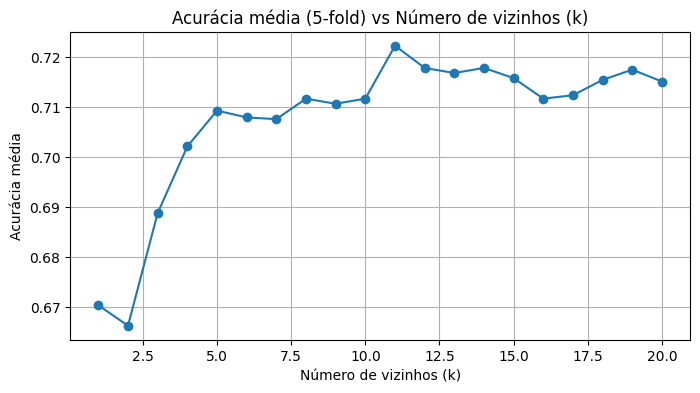

Melhor valor de k: 11 (Acurácia média = 0.722)


In [123]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

k_values = range(1, 21)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_scaled, y, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

plt.figure(figsize=(8, 4))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title("Acurácia média (5-fold) vs Número de vizinhos (k)")
plt.xlabel("Número de vizinhos (k)")
plt.ylabel("Acurácia média")
plt.grid(True)
plt.savefig('/home/mgabriel4/Documentos/GitHub/machine-learning/docs/classes/knn/img/acuracia.png')
plt.show()

best_k = k_values[np.argmax(mean_scores)]
print(f"Melhor valor de k: {best_k} (Acurácia média = {max(mean_scores):.3f})")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

Accuracy: 0.80


Acurácia: 0.8043230944254836

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       286
           1       0.68      0.70      0.69       274
           2       0.92      0.88      0.90       319

    accuracy                           0.80       879
   macro avg       0.80      0.80      0.80       879
weighted avg       0.81      0.80      0.81       879



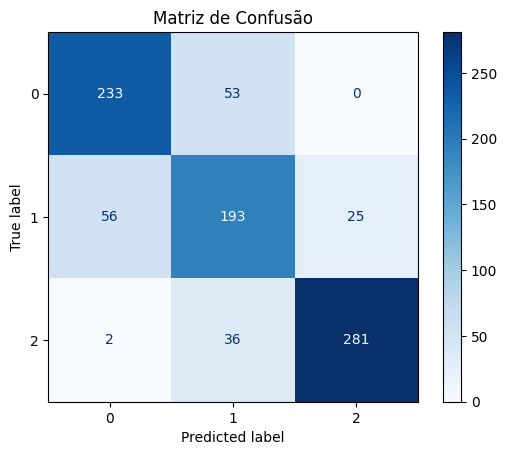

In [124]:
print("Acurácia:", accuracy_score(y_test, predictions))
print("\nRelatório de classificação:\n", classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.savefig('/home/mgabriel4/Documentos/GitHub/machine-learning/docs/classes/knn/img/matriz_confusao.png')
plt.show()

Realizando um gráfico de limite de decisão com duas features, pois nosso objetivo é visualizar o funcionamento do KNN. É importante lembrar que, na prática, o KNN pode ser aplicado com mais de duas features, porém o gráfico de limite de decisão só pode ser feito com duas features.

Como vimos que bateu o valor de k (k=11) com validação cruzada, vamos usar esse valor para treinar o modelo e fazer a matriz de confusão e o relatório de classificação.

In [126]:
# Pegue apenas as duas features mais relevantes
features_duas = ['Overall Qual', 'Gr Liv Area']
x_duas = df[features_duas].values

# Escalona
x_scaled = StandardScaler().fit_transform(x_duas)

# Divide
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Treina o modelo
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)


,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


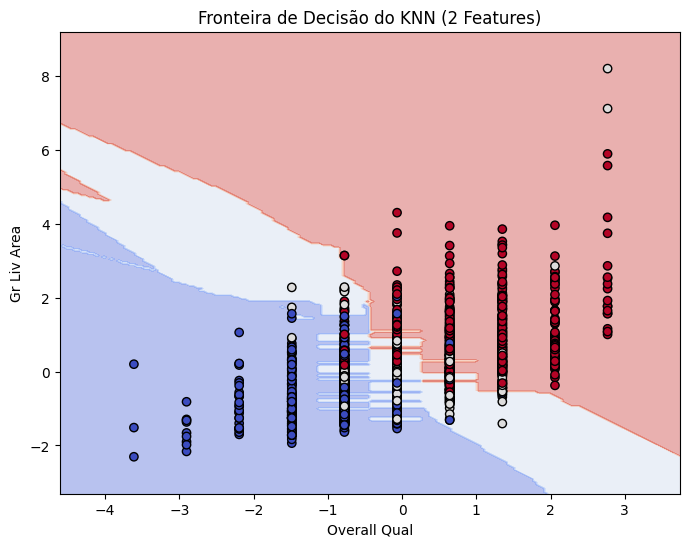

In [127]:
# Gerar fronteira de decisão
h = 0.05
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel(features_duas[0])
plt.ylabel(features_duas[1])
plt.title('Fronteira de Decisão do KNN (2 Features)')
plt.savefig('/home/mgabriel4/Documentos/GitHub/machine-learning/docs/classes/knn/img/fronteira_decisao.png')
plt.show()
